In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'C:\\Users\\bahad\\GitHub\\IE48B-Project\\Bahadır\\Final Notebooks'

In [3]:
data_path="D:/Datasets/IE48B_project/sample_data_files/"
initial_data="First_Data.csv"

In [4]:
# data=pd.read_csv(f"{data_path}{initial_data}")

In [5]:
data=pd.read_csv("bulk_imbalance.csv")

In [6]:
data.head()

date  hour       net  upRegulationZeroCoded  upRegulationOneCoded  \
0  2019-01-01     0 -1934.795                    0.0                   0.0   
1  2019-01-01     1  -750.866                    0.0                   0.0   
2  2019-01-01     2  -982.767                    0.0                   0.0   
3  2019-01-01     3  -764.620                    0.0                   0.0   
4  2019-01-01     4 -1233.289                    0.0                   0.0   

   upRegulationTwoCoded  downRegulationZeroCoded  downRegulationOneCoded  \
0                     0                 2288.567                     0.0   
1                     0                  808.083                     0.0   
2                     0                 1060.750                     0.0   
3                     0                 1120.483                     0.0   
4                     0                 1874.633                    56.0   

   downRegulationTwoCoded  upRegulationDelivered  downRegulationDelivered  \
0                       0                    0.0                -1934.795   
1                       0                    0.0                 -750.866   
2                       0                    0.0                 -982.767   
3                       0                    0.0                 -764.620   
4                       0                    0.0                -1233.289   

  system_direction  
0         Negative  
1         Negative  
2         Negative  
3         Negative  
4         Negative

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26832 entries, 0 to 26831
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     26832 non-null  object 
 1   hour                     26832 non-null  int64  
 2   net                      26832 non-null  float64
 3   upRegulationZeroCoded    26832 non-null  float64
 4   upRegulationOneCoded     26832 non-null  float64
 5   upRegulationTwoCoded     26832 non-null  int64  
 6   downRegulationZeroCoded  26832 non-null  float64
 7   downRegulationOneCoded   26832 non-null  float64
 8   downRegulationTwoCoded   26832 non-null  int64  
 9   upRegulationDelivered    26832 non-null  float64
 10  downRegulationDelivered  26832 non-null  float64
 11  system_direction         26808 non-null  object 
dtypes: float64(7), int64(3), object(2)
memory usage: 2.5+ MB


## Data Inspection

In [8]:
import pandas_profiling

In [9]:
profile = pandas_profiling.profile_report.ProfileReport(data, explorative=True)

In [10]:
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation

In [11]:
data.columns

Index(['date', 'hour', 'net', 'upRegulationZeroCoded', 'upRegulationOneCoded',
       'upRegulationTwoCoded', 'downRegulationZeroCoded',
       'downRegulationOneCoded', 'downRegulationTwoCoded',
       'upRegulationDelivered', 'downRegulationDelivered', 'system_direction'],
      dtype='object')

In [12]:
corr_df=data.corr()

In [13]:
corr_df

hour       net  upRegulationZeroCoded  \
hour                     1.000000  0.129853               0.128186   
net                      0.129853  1.000000               0.858280   
upRegulationZeroCoded    0.128186  0.858280               1.000000   
upRegulationOneCoded     0.058422  0.030921              -0.109718   
upRegulationTwoCoded          NaN       NaN                    NaN   
downRegulationZeroCoded  0.022954 -0.487597              -0.313936   
downRegulationOneCoded  -0.020184 -0.085473               0.091839   
downRegulationTwoCoded        NaN       NaN                    NaN   
upRegulationDelivered    0.151178  0.778473               0.784907   
downRegulationDelivered -0.012063  0.454523               0.224415   

                         upRegulationOneCoded  upRegulationTwoCoded  \
hour                                 0.058422                   NaN   
net                                  0.030921                   NaN   
upRegulationZeroCoded               -0.109718                   NaN   
upRegulationOneCoded                 1.000000                   NaN   
upRegulationTwoCoded                      NaN                   NaN   
downRegulationZeroCoded              0.597224                   NaN   
downRegulationOneCoded               0.335422                   NaN   
downRegulationTwoCoded                    NaN                   NaN   
upRegulationDelivered                0.489086                   NaN   
downRegulationDelivered             -0.645846                   NaN   

                         downRegulationZeroCoded  downRegulationOneCoded  \
hour                                    0.022954               -0.020184   
net                                    -0.487597               -0.085473   
upRegulationZeroCoded                  -0.313936                0.091839   
upRegulationOneCoded                    0.597224                0.335422   
upRegulationTwoCoded                         NaN                     NaN   
downRegulationZeroCoded                 1.000000                0.142681   
downRegulationOneCoded                  0.142681                1.000000   
downRegulationTwoCoded                       NaN                     NaN   
upRegulationDelivered                   0.099917                0.283038   
downRegulationDelivered                -0.902077               -0.534933   

                         downRegulationTwoCoded  upRegulationDelivered  \
hour                                        NaN               0.151178   
net                                         NaN               0.778473   
upRegulationZeroCoded                       NaN               0.784907   
upRegulationOneCoded                        NaN               0.489086   
upRegulationTwoCoded                        NaN                    NaN   
downRegulationZeroCoded                     NaN               0.099917   
downRegulationOneCoded                      NaN               0.283038   
downRegulationTwoCoded                      NaN                    NaN   
upRegulationDelivered                       NaN               1.000000   
downRegulationDelivered                     NaN              -0.205261   

                         downRegulationDelivered  
hour                                   -0.012063  
net                                     0.454523  
upRegulationZeroCoded                   0.224415  
upRegulationOneCoded                   -0.645846  
upRegulationTwoCoded                         NaN  
downRegulationZeroCoded                -0.902077  
downRegulationOneCoded                 -0.534933  
downRegulationTwoCoded                       NaN  
upRegulationDelivered                  -0.205261  
downRegulationDelivered                 1.000000

In [15]:
corr_df[["net"]].sort_values("net")

net
downRegulationZeroCoded -0.487597
downRegulationOneCoded  -0.085473
upRegulationOneCoded     0.030921
hour                     0.129853
downRegulationDelivered  0.454523
upRegulationDelivered    0.778473
upRegulationZeroCoded    0.858280
net                      1.000000
upRegulationTwoCoded          NaN
downRegulationTwoCoded        NaN

## Result

yal_one aslinda buradaki en kritik değer olarak kabul edilebilir çünkü o belirleyici bir rol oynuyor diğerlerine nazaran.

# Visual Contorl for Sum Yal

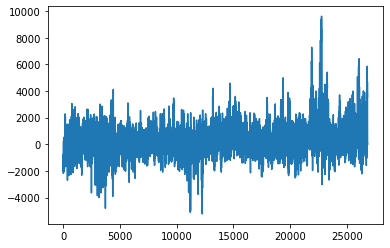

In [18]:
plt.plot(data["net"])
plt.show()

# Manuel Anomaly Detection

In [19]:
import numpy as np

In [20]:
data.head()

date  hour       net  upRegulationZeroCoded  upRegulationOneCoded  \
0  2019-01-01     0 -1934.795                    0.0                   0.0   
1  2019-01-01     1  -750.866                    0.0                   0.0   
2  2019-01-01     2  -982.767                    0.0                   0.0   
3  2019-01-01     3  -764.620                    0.0                   0.0   
4  2019-01-01     4 -1233.289                    0.0                   0.0   

   upRegulationTwoCoded  downRegulationZeroCoded  downRegulationOneCoded  \
0                     0                 2288.567                     0.0   
1                     0                  808.083                     0.0   
2                     0                 1060.750                     0.0   
3                     0                 1120.483                     0.0   
4                     0                 1874.633                    56.0   

   downRegulationTwoCoded  upRegulationDelivered  downRegulationDelivered  \
0                       0                    0.0                -1934.795   
1                       0                    0.0                 -750.866   
2                       0                    0.0                 -982.767   
3                       0                    0.0                 -764.620   
4                       0                    0.0                -1233.289   

  system_direction  
0         Negative  
1         Negative  
2         Negative  
3         Negative  
4         Negative

In [21]:
data_req_hour=data[(data["hour"]<=23) & (data["hour"]>=12)]

## Aggregation

In [22]:
data_daily=data_req_hour.loc[:, (data_req_hour.columns!="hour") ].groupby(["date"]).agg("sum")

In [23]:
data_daily

net  upRegulationZeroCoded  upRegulationOneCoded  \
date                                                                 
2019-01-01  -4936.504               2263.768                 0.000   
2019-01-02  -7209.304                245.833                 0.000   
2019-01-03  -8611.582                250.166                 0.000   
2019-01-04 -18194.470                640.168                 0.000   
2019-01-05  -7281.792                183.366                 0.000   
...               ...                    ...                   ...   
2022-01-18  14661.584              17118.337                 0.000   
2022-01-19  11689.701              14880.947                 6.667   
2022-01-20  17289.558              19882.518                 0.000   
2022-01-21  45049.388              49622.803                 0.000   
2022-01-22      0.000                  0.000                 0.000   

            upRegulationTwoCoded  downRegulationZeroCoded  \
date                                                        
2019-01-01                     0                 6998.035   
2019-01-02                     0                 8863.785   
2019-01-03                     0                10972.534   
2019-01-04                     0                22524.867   
2019-01-05                     0                11868.664   
...                          ...                      ...   
2022-01-18                     0                  660.050   
2022-01-19                     0                  394.900   
2022-01-20                     0                  542.800   
2022-01-21                     0                   78.000   
2022-01-22                     0                    0.000   

            downRegulationOneCoded  downRegulationTwoCoded  \
date                                                         
2019-01-01                   0.000                       0   
2019-01-02                   0.000                       0   
2019-01-03                   0.000                       0   
2019-01-04                   0.000                       0   
2019-01-05                   0.000                       0   
...                            ...                     ...   
2022-01-18                 792.584                       0   
2022-01-19                   0.000                       0   
2022-01-20                   0.000                       0   
2022-01-21                1884.866                       0   
2022-01-22                   0.000                       0   

            upRegulationDelivered  downRegulationDelivered  
date                                                        
2019-01-01               1269.321                -6205.825  
2019-01-02                245.833                -7455.137  
2019-01-03                249.496                -8861.078  
2019-01-04                640.168               -18834.638  
2019-01-05                181.196                -7462.988  
...                           ...                      ...  
2022-01-18              16033.705                -1372.121  
2022-01-19              12083.301                 -393.600  
2022-01-20              17828.009                 -538.451  
2022-01-21              47011.284                -1961.896  
2022-01-22                  0.000                    0.000  

[1118 rows x 9 columns]

# Events

In [24]:
from datetime import datetime, timedelta

In [26]:
data_daily["event"]=""

In [27]:
events={"2019-01-01":"Yeni Yil Tatili", 
        "2019-04-23":"Ulusal Egemenlik ve cocuk Bayrami",
        "2019-05-01":"Emek ve Dayanisma Gunu",
        "2019-05-19":"Ataturk’u Anma Genclik ve Spor Bayrami", 
        "2019-06-03":"Ramazan Bayrami Arifesi",
        "2019-06-04":"Ramazan Bayrami",
        "2019-06-05":"Ramazan Bayrami", 
        "2019-06-06":"Ramazan Bayrami",
        "2019-07-15":"Demokrasi ve Milli Birlik Gunu", 
        "2019-08-10":"Kurban Bayrami Arifesi",
        "2019-08-11":"Kurban Bayrami", 
        "2019-08-12":"Kurban Bayrami",
        "2019-08-13":"Kurban Bayrami", 
        "2019-08-14":"Kurban Bayrami",
        "2019-08-30":"Zafer Bayrami", 
        "2019-10-28":"Cumhuriyet Bayrami",
        "2019-10-29":"Cumhuriyet Bayrami", 
        
        "2020-01-01":"Yeni Yil Tatili", 
        "2020-04-23":"Ulusal Egemenlik ve cocuk Bayrami",
        "2020-05-01":"Emek ve Dayanisma Gunu",
        "2020-05-19":"Ataturk’u Anma Genclik ve Spor Bayrami", 
        "2020-05-23":"Ramazan Bayrami Arifesi",
        "2020-05-24":"Ramazan Bayrami",
        "2020-05-25":"Ramazan Bayrami", 
        "2020-05-26":"Ramazan Bayrami",
        "2020-07-15":"Demokrasi ve Milli Birlik Gunu", 
        "2020-07-30":"Kurban Bayrami Arifesi",
        "2020-07-31":"Kurban Bayrami", 
        "2020-08-01":"Kurban Bayrami",
        "2020-08-02":"Kurban Bayrami", 
        "2020-08-03":"Kurban Bayrami",
        "2020-08-30":"Zafer Bayrami", 
        "2020-10-28":"Cumhuriyet Bayrami",
        "2020-10-29":"Cumhuriyet Bayrami",
        
        "2021-01-01":"Yeni Yil Tatili", 
        "2021-04-23":"Ulusal Egemenlik ve cocuk Bayrami",
        "2021-05-01":"Emek ve Dayanisma Gunu",
        "2021-05-12":"Ataturk’u Anma Genclik ve Spor Bayrami", 
        "2021-05-13":"Ramazan Bayrami Arifesi",
        "2021-05-14":"Ramazan Bayrami",
        "2021-05-15":"Ramazan Bayrami", 
        "2021-05-19":"Ramazan Bayrami",
        "2021-07-15":"Demokrasi ve Milli Birlik Gunu", 
        "2021-07-19":"Kurban Bayrami Arifesi",
        "2021-07-20":"Kurban Bayrami", 
        "2021-07-21":"Kurban Bayrami",
        "2021-07-22":"Kurban Bayrami", 
        "2021-07-23":"Kurban Bayrami",
        "2021-08-30":"Zafer Bayrami", 
        "2021-10-28":"Cumhuriyet Bayrami",
        "2021-10-29":"Cumhuriyet Bayrami"}

In [28]:
for key, value in events.items():
    if key in data_daily.index:
        data_daily.at[key, "event"]= value

In [29]:
data_daily

net  upRegulationZeroCoded  upRegulationOneCoded  \
date                                                                 
2019-01-01  -4936.504               2263.768                 0.000   
2019-01-02  -7209.304                245.833                 0.000   
2019-01-03  -8611.582                250.166                 0.000   
2019-01-04 -18194.470                640.168                 0.000   
2019-01-05  -7281.792                183.366                 0.000   
...               ...                    ...                   ...   
2022-01-18  14661.584              17118.337                 0.000   
2022-01-19  11689.701              14880.947                 6.667   
2022-01-20  17289.558              19882.518                 0.000   
2022-01-21  45049.388              49622.803                 0.000   
2022-01-22      0.000                  0.000                 0.000   

            upRegulationTwoCoded  downRegulationZeroCoded  \
date                                                        
2019-01-01                     0                 6998.035   
2019-01-02                     0                 8863.785   
2019-01-03                     0                10972.534   
2019-01-04                     0                22524.867   
2019-01-05                     0                11868.664   
...                          ...                      ...   
2022-01-18                     0                  660.050   
2022-01-19                     0                  394.900   
2022-01-20                     0                  542.800   
2022-01-21                     0                   78.000   
2022-01-22                     0                    0.000   

            downRegulationOneCoded  downRegulationTwoCoded  \
date                                                         
2019-01-01                   0.000                       0   
2019-01-02                   0.000                       0   
2019-01-03                   0.000                       0   
2019-01-04                   0.000                       0   
2019-01-05                   0.000                       0   
...                            ...                     ...   
2022-01-18                 792.584                       0   
2022-01-19                   0.000                       0   
2022-01-20                   0.000                       0   
2022-01-21                1884.866                       0   
2022-01-22                   0.000                       0   

            upRegulationDelivered  downRegulationDelivered            event  
date                                                                         
2019-01-01               1269.321                -6205.825  Yeni Yil Tatili  
2019-01-02                245.833                -7455.137                   
2019-01-03                249.496                -8861.078                   
2019-01-04                640.168               -18834.638                   
2019-01-05                181.196                -7462.988                   
...                           ...                      ...              ...  
2022-01-18              16033.705                -1372.121                   
2022-01-19              12083.301                 -393.600                   
2022-01-20              17828.009                 -538.451                   
2022-01-21              47011.284                -1961.896                   
2022-01-22                  0.000                    0.000                   

[1118 rows x 10 columns]

In [30]:
data_daily.to_csv(data_path+"data_daily_event.csv")

# All Extreme Points

In [33]:
upper_limit=np.quantile(data_daily["net"], 0.95)
lower_limit=np.quantile(data_daily["net"], 0.05)

In [34]:
upper_limit

25879.68019999997

In [35]:
lower_limit

-10908.2216

In [38]:
ext_data=data_daily[(data_daily["net"]>=upper_limit) | (data_daily["net"]<=lower_limit)]

In [39]:
ext_data.head()

net  upRegulationZeroCoded  upRegulationOneCoded  \
date                                                                 
2019-01-04 -18194.470                640.168                   0.0   
2019-01-17 -11177.479               2019.600                   0.0   
2019-01-20 -16111.589                  0.000                   0.0   
2019-01-28 -18648.800                  0.000                   0.0   
2019-03-09 -15677.235                 41.667                   0.0   

            upRegulationTwoCoded  downRegulationZeroCoded  \
date                                                        
2019-01-04                     0                22524.867   
2019-01-17                     0                11483.884   
2019-01-20                     0                22983.999   
2019-01-28                     0                23447.567   
2019-03-09                     0                16874.650   

            downRegulationOneCoded  downRegulationTwoCoded  \
date                                                         
2019-01-04                     0.0                       0   
2019-01-17                  3804.1                       0   
2019-01-20                     0.0                       0   
2019-01-28                     0.0                       0   
2019-03-09                     0.0                       0   

            upRegulationDelivered  downRegulationDelivered event  
date                                                              
2019-01-04                640.168               -18834.638        
2019-01-17               1105.663               -12283.142        
2019-01-20                  0.000               -16111.589        
2019-01-28                  0.000               -18648.800        
2019-03-09                 41.667               -15718.902

In [40]:
ext_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112 entries, 2019-01-04 to 2022-01-21
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   net                      112 non-null    float64
 1   upRegulationZeroCoded    112 non-null    float64
 2   upRegulationOneCoded     112 non-null    float64
 3   upRegulationTwoCoded     112 non-null    int64  
 4   downRegulationZeroCoded  112 non-null    float64
 5   downRegulationOneCoded   112 non-null    float64
 6   downRegulationTwoCoded   112 non-null    int64  
 7   upRegulationDelivered    112 non-null    float64
 8   downRegulationDelivered  112 non-null    float64
 9   event                    112 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 9.6+ KB


## Important Date Finder

In [41]:
important_dates_2=[]
important_dates_3=[]
important_dates_4=[]
for i in range(ext_data.shape[0]-1):
    current_date=datetime.strptime(ext_data.index[i], '%Y-%m-%d')
    next_day=current_date + timedelta(days=1)
    two_day=current_date + timedelta(days=2)
    three_day=current_date + timedelta(days=3)
    if datetime.strptime(ext_data.index[i+1], '%Y-%m-%d')==next_day:
        important_dates_2.append(ext_data.index[i])
        if i < ext_data.shape[0]-2:
            if datetime.strptime(ext_data.index[i+2], '%Y-%m-%d')==two_day:
                important_dates_3.append(ext_data.index[i])
                if i < ext_data.shape[0]-3:
                    if datetime.strptime(ext_data.index[i+3], '%Y-%m-%d')==three_day:
                        important_dates_4.append(ext_data.index[i])

In [42]:
important_dates_2

['2019-03-09',
 '2019-06-04',
 '2019-06-28',
 '2019-06-29',
 '2019-06-30',
 '2019-07-13',
 '2020-02-25',
 '2020-04-06',
 '2020-05-22',
 '2020-05-23',
 '2020-05-24',
 '2020-07-02',
 '2020-07-08',
 '2020-09-01',
 '2020-09-02',
 '2020-09-23',
 '2020-10-06',
 '2020-12-28',
 '2020-12-29',
 '2021-02-03',
 '2021-03-09',
 '2021-06-25',
 '2021-06-28',
 '2021-06-29',
 '2021-06-30',
 '2021-07-01',
 '2021-07-29',
 '2021-07-30',
 '2021-08-02',
 '2021-08-03',
 '2021-08-04',
 '2021-08-05',
 '2021-08-17',
 '2021-08-25',
 '2021-08-26',
 '2021-09-02',
 '2021-12-16',
 '2021-12-20',
 '2021-12-21',
 '2021-12-22']

In [43]:
important_dates_3

['2019-06-28',
 '2019-06-29',
 '2020-05-22',
 '2020-05-23',
 '2020-09-01',
 '2020-12-28',
 '2021-06-28',
 '2021-06-29',
 '2021-06-30',
 '2021-07-29',
 '2021-08-02',
 '2021-08-03',
 '2021-08-04',
 '2021-08-25',
 '2021-12-20',
 '2021-12-21']

In [44]:
important_dates_4

['2019-06-28',
 '2020-05-22',
 '2021-06-28',
 '2021-06-29',
 '2021-08-02',
 '2021-08-03',
 '2021-12-20']

### Date Controls

In [45]:
events_df=pd.DataFrame.from_dict(events,orient='index')
events_df.reset_index(level=0, inplace=True)

In [46]:
events_df[events_df.isin(important_dates_2).loc[:,"index"]]

index                        0
5   2019-06-04          Ramazan Bayrami
21  2020-05-23  Ramazan Bayrami Arifesi
22  2020-05-24          Ramazan Bayrami

In [47]:
events_df[events_df.isin(important_dates_3).loc[:,"index"]]

index                        0
21  2020-05-23  Ramazan Bayrami Arifesi

In [48]:
events_df[events_df.isin(important_dates_4).loc[:,"index"]]

Empty DataFrame
Columns: [index, 0]
Index: []

# Postive Imbalance

In [50]:
pot_ext_df=ext_data[ext_data["net"]>0]
pot_ext_df

net  upRegulationZeroCoded  upRegulationOneCoded  \
date                                                                 
2019-04-01  26128.507              42644.981                 0.000   
2019-06-25  33982.908              27415.301             13794.966   
2019-07-03  36038.056              38028.536              6571.949   
2019-08-26  29454.199              36994.367                 0.000   
2020-01-06  27446.566              31927.648                 0.000   
2020-02-08  28520.773              32913.202                 0.000   
2020-07-02  31774.933              32620.583              4247.000   
2020-07-03  30559.055              36734.030                 0.000   
2020-07-26  27526.311              32186.023                 0.000   
2020-08-25  27153.286              29637.982              1488.334   
2020-09-01  29417.435              32877.899                 0.000   
2020-09-02  32323.309              36990.890                 0.000   
2020-09-03  46716.710              54411.097                 0.000   
2020-09-23  37312.015              40032.517                 0.000   
2020-09-24  33095.948              36092.564                 0.000   
2020-10-06  26919.594              31551.366                 0.000   
2020-10-07  26054.702              29495.500                 0.000   
2021-01-18  30229.607              35931.367                 0.000   
2021-03-09  30288.200              32755.419                 0.000   
2021-03-10  30650.873              34325.486                 0.000   
2021-03-18  39716.380              45148.450                 0.000   
2021-04-10  31398.748              34384.299                 0.000   
2021-04-12  32025.933              34190.831                 0.000   
2021-06-25  33548.800              37234.049                 0.000   
2021-06-26  26947.574              30228.552                 0.000   
2021-06-28  30165.554              34811.817                 0.000   
2021-06-29  29969.097              33978.730                 0.000   
2021-06-30  64511.929              76338.880                 0.000   
2021-07-01  67107.201              78314.017                 0.000   
2021-07-02  43650.542              55152.536                 0.000   
2021-07-05  40549.047              42366.317                 0.000   
2021-07-17  31777.250              34993.433                 0.000   
2021-07-26  26104.220              30056.853                 0.000   
2021-07-29  37582.477              42197.816                 0.000   
2021-07-30  58284.962              62084.884                 0.000   
2021-07-31  47654.423              53262.080                 0.000   
2021-08-02  77832.166              82285.964                 0.000   
2021-08-03  67857.957              76095.300                 0.000   
2021-08-04  86280.360              92640.183                 0.000   
2021-08-05  98095.948             104229.267                 0.000   
2021-08-06  93203.126              99691.003                 0.000   
2021-08-11  32930.799              36340.217                 0.000   
2021-08-17  35940.612              38628.617                 0.000   
2021-08-18  33035.630              35705.050                 0.000   
2021-08-25  40818.135              44299.684                 0.000   
2021-08-26  52292.960              55257.450                 0.000   
2021-08-27  48729.994              51967.067                 0.000   
2021-12-16  26057.704              26872.268                 0.000   
2021-12-17  35092.792              35790.166                 0.000   
2021-12-20  39545.354              41772.652                 0.000   
2021-12-21  31121.900              37505.784                 0.000   
2021-12-22  41354.631              55052.248                 0.000   
2021-12-23  30779.736              53607.549                 0.000   
2022-01-06  31947.725              33037.566                 0.000   
2022-01-11  37893.528              40566.717                 0.000   
2022-01-21  45049.388       

## Event Names

In [52]:
pot_ext_df[pot_ext_df["event"]!=""]

Empty DataFrame
Columns: [net, upRegulationZeroCoded, upRegulationOneCoded, upRegulationTwoCoded, downRegulationZeroCoded, downRegulationOneCoded, downRegulationTwoCoded, upRegulationDelivered, downRegulationDelivered, event]
Index: []

## Sorted Values

In [53]:
pot_ext_df.sort_values("net", ascending=False).iloc[1:10,:]

net  upRegulationZeroCoded  upRegulationOneCoded  \
date                                                                 
2021-08-06  93203.126              99691.003                   0.0   
2021-08-04  86280.360              92640.183                   0.0   
2021-08-02  77832.166              82285.964                   0.0   
2021-08-03  67857.957              76095.300                   0.0   
2021-07-01  67107.201              78314.017                   0.0   
2021-06-30  64511.929              76338.880                   0.0   
2021-07-30  58284.962              62084.884                   0.0   
2021-08-26  52292.960              55257.450                   0.0   
2021-08-27  48729.994              51967.067                   0.0   

            upRegulationTwoCoded  downRegulationZeroCoded  \
date                                                        
2021-08-06                     0                    0.000   
2021-08-04                     0                    0.000   
2021-08-02                     0                    0.000   
2021-08-03                     0                    0.000   
2021-07-01                     0                  135.134   
2021-06-30                     0                    0.000   
2021-07-30                     0                    0.000   
2021-08-26                     0                   50.300   
2021-08-27                     0                   77.250   

            downRegulationOneCoded  downRegulationTwoCoded  \
date                                                         
2021-08-06                   0.000                       0   
2021-08-04                2558.167                       0   
2021-08-02                   0.000                       0   
2021-08-03                3741.835                       0   
2021-07-01                   0.000                       0   
2021-06-30                   0.000                       0   
2021-07-30                   0.000                       0   
2021-08-26                   0.000                       0   
2021-08-27                   0.000                       0   

            upRegulationDelivered  downRegulationDelivered event  
date                                                              
2021-08-06              93203.126                    0.000        
2021-08-04              88654.527                -2374.167        
2021-08-02              77832.166                    0.000        
2021-08-03              71522.224                -3664.267        
2021-07-01              67235.960                 -128.759        
2021-06-30              64511.929                    0.000        
2021-07-30              58284.962                    0.000        
2021-08-26              52342.760                  -49.800        
2021-08-27              48807.244                  -77.250

# Negative Imbalance

In [54]:
neg_ext_df=ext_data[ext_data["net"]<0]
neg_ext_df

net  upRegulationZeroCoded  upRegulationOneCoded  \
date                                                                 
2019-01-04 -18194.470                640.168                 0.000   
2019-01-17 -11177.479               2019.600                 0.000   
2019-01-20 -16111.589                  0.000                 0.000   
2019-01-28 -18648.800                  0.000                 0.000   
2019-03-09 -15677.235                 41.667                 0.000   
2019-03-10 -15280.100                 54.166                 0.000   
2019-04-14 -16097.128               2299.367              8862.849   
2019-06-04 -32237.438               4355.845               394.767   
2019-06-05 -13244.768              13333.583              1464.299   
2019-06-28 -11023.723                449.168              3746.383   
2019-06-29 -24209.235                 19.917                 0.000   
2019-06-30 -19920.178                 40.250                 0.000   
2019-07-01 -29624.172                211.917              6325.667   
2019-07-11 -18192.803                154.666                 0.000   
2019-07-13 -11080.907                194.500                 0.000   
2019-07-14 -13547.695                 63.100                 0.000   
2019-08-05 -13657.450                277.967                 0.000   
2019-08-17 -13047.887                 99.417                 0.000   
2019-09-08 -13297.637                171.834                 0.000   
2019-09-15 -11670.190                279.133                 0.000   
2019-09-21 -24191.682                319.249                 0.000   
2020-02-03 -11101.520                197.666                 0.000   
2020-02-25 -13390.492                599.366                 0.000   
2020-02-26 -13299.576                572.001                 0.000   
2020-03-02 -11940.048                147.666                96.667   
2020-03-11 -11088.892                212.483              8628.899   
2020-03-21 -15240.067                688.183              1894.067   
2020-03-23 -16588.493                230.116              1365.700   
2020-03-30 -14291.782                168.083              8750.566   
2020-04-06 -14317.567                 55.000                 0.000   
2020-04-07 -11043.764                  0.000              2359.499   
2020-04-11 -29725.309                 18.333                 0.000   
2020-05-01 -19906.628                177.599                 0.000   
2020-05-10 -12752.545                 74.467                 0.000   
2020-05-22 -20301.316                 18.267                 0.000   
2020-05-23 -20928.733                 50.834                 0.000   
2020-05-24 -20373.771                415.467                 0.000   
2020-05-25 -17973.323                 20.750                 0.000   
2020-07-08 -14421.001                213.116                 0.000   
2020-07-09 -19532.547                132.167                 0.000   
2020-08-03 -14282.613                162.000                 0.000   
2020-11-18 -17749.750               2259.225                 0.000   
2020-12-28 -12187.690                226.500                 0.000   
2020-12-29 -20493.418                685.082                 0.000   
2020-12-30 -13142.825                627.083                 0.000   
2021-01-02 -12841.856                282.384                 0.000   
2021-01-23 -12574.789               1072.917                 0.000   
2021-02-03 -12821.221                761.966                 0.000   
2021-02-04 -14440.116                545.917                 0.000   
2021-04-07 -13782.827               1533.349                 0.000   
2021-05-13 -16562.912                505.635                 0.000   
2021-07-24 -17230.998               1430.199                 0.000   
2021-08-08 -20723.291                  0.000                 0.000   
2021-09-02 -22637.766                  0.000                 0.000   
2021-09-03 -16769.970               1087.900                 0.000   
2021-09-23 -12162.570       

In [60]:
neg_ext_df[neg_ext_df["event"]!=""].iloc[:,[0,-1]]

net                    event
date                                          
2019-06-04 -32237.438          Ramazan Bayrami
2019-06-05 -13244.768          Ramazan Bayrami
2020-05-01 -19906.628   Emek ve Dayanisma Gunu
2020-05-23 -20928.733  Ramazan Bayrami Arifesi
2020-05-24 -20373.771          Ramazan Bayrami
2020-05-25 -17973.323          Ramazan Bayrami
2020-08-03 -14282.613           Kurban Bayrami
2021-05-13 -16562.912  Ramazan Bayrami Arifesi